In [46]:
import os
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## Image classication by SVM

## Preprocessing the images (detect face and eyes)

In [47]:
img=cv2.imread('./test_images/Aishwarya1.jpg')
img.shape

(531, 403, 3)

In [48]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(531, 403)

In [49]:
gray

array([[201, 202, 203, ..., 220, 219, 218],
       [199, 200, 201, ..., 217, 217, 217],
       [195, 196, 197, ..., 217, 217, 217],
       ...,
       [ 12,   8,  15, ..., 173, 172, 170],
       [  5,  10,  11, ..., 172, 171, 169],
       [  9,  16,  13, ..., 171, 170, 168]], dtype=uint8)

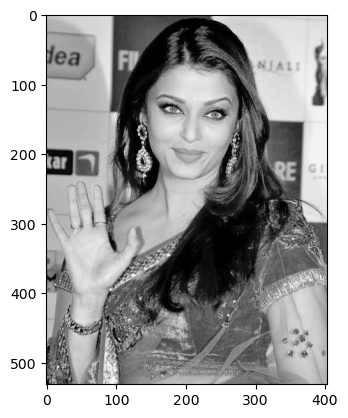

In [50]:
plt.imshow(gray, cmap="gray")

In [51]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[131,  83, 157, 157]])

In [52]:
(x,y,w,h)=faces[0]

In [53]:
x,y,w,h

(131, 83, 157, 157)

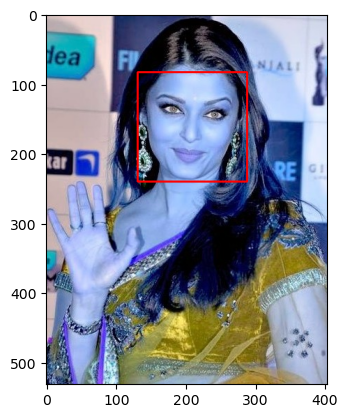

In [54]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

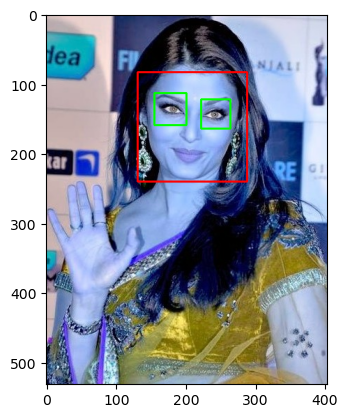

In [55]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

## Crop the facial region of the face from whole picture

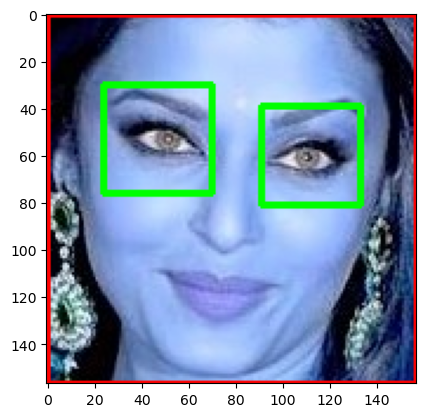

In [56]:
plt.imshow(roi_color, cmap="gray")

In [57]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


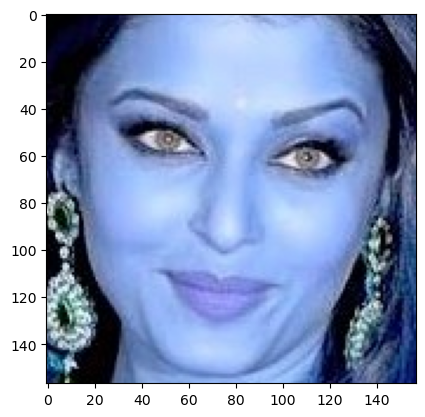

In [58]:
cropped_img = get_cropped_image_if_2_eyes('./test_images/Aishwarya1.jpg')
plt.imshow(cropped_img)

## All the images in dataset folder are scanned and create cropped images for them in a seperate cropped folder

In [59]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [60]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [61]:
img_dirs

['./dataset/Deepika_Padukone',
 './dataset/KL_Rahul',
 './dataset/Mahesh_Babu',
 './dataset/Rehman_AR',
 './dataset/Shreya_Ghoshal']

In [62]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [63]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 


Deepika_Padukone
Generating cropped images in folder:  ./dataset/cropped/Deepika_Padukone
KL_Rahul
Generating cropped images in folder:  ./dataset/cropped/KL_Rahul
Mahesh_Babu
Generating cropped images in folder:  ./dataset/cropped/Mahesh_Babu
Rehman_AR
Generating cropped images in folder:  ./dataset/cropped/Rehman_AR
Shreya_Ghoshal
Generating cropped images in folder:  ./dataset/cropped/Shreya_Ghoshal


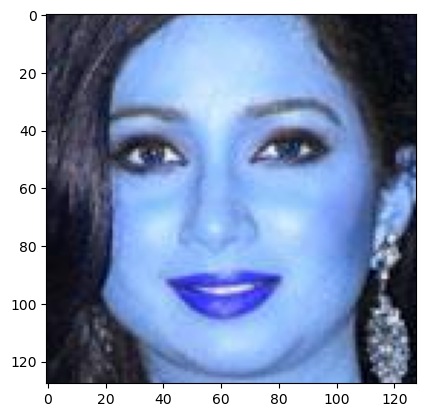

In [64]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

## Use Wavelet transform as a feature for training our model

In [65]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

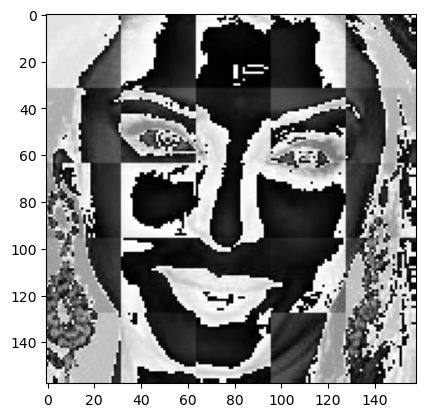

In [66]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [67]:
celebrity_file_names_dict

{'Deepika_Padukone': ['./dataset/cropped/Deepika_Padukone/Deepika_Padukone1.png',
  './dataset/cropped/Deepika_Padukone/Deepika_Padukone2.png',
  './dataset/cropped/Deepika_Padukone/Deepika_Padukone3.png',
  './dataset/cropped/Deepika_Padukone/Deepika_Padukone4.png',
  './dataset/cropped/Deepika_Padukone/Deepika_Padukone5.png',
  './dataset/cropped/Deepika_Padukone/Deepika_Padukone6.png',
  './dataset/cropped/Deepika_Padukone/Deepika_Padukone7.png',
  './dataset/cropped/Deepika_Padukone/Deepika_Padukone8.png',
  './dataset/cropped/Deepika_Padukone/Deepika_Padukone9.png',
  './dataset/cropped/Deepika_Padukone/Deepika_Padukone10.png',
  './dataset/cropped/Deepika_Padukone/Deepika_Padukone11.png',
  './dataset/cropped/Deepika_Padukone/Deepika_Padukone12.png',
  './dataset/cropped/Deepika_Padukone/Deepika_Padukone13.png',
  './dataset/cropped/Deepika_Padukone/Deepika_Padukone14.png',
  './dataset/cropped/Deepika_Padukone/Deepika_Padukone15.png',
  './dataset/cropped/Deepika_Padukone/Deepik

In [68]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Deepika_Padukone': 0,
 'KL_Rahul': 1,
 'Mahesh_Babu': 2,
 'Rehman_AR': 3,
 'Shreya_Ghoshal': 4}

## Cropped images are used for model training

In [69]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [70]:
len(X[0])

4096

In [71]:
X[0]

array([[ 16],
       [ 57],
       [208],
       ...,
       [228],
       [220],
       [  8]], dtype=uint8)

In [72]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(171, 4096)

In [73]:
X[0]

array([ 16.,  57., 208., ..., 228., 220.,   8.])

In [74]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7906976744186046

In [76]:
len(X_test)

43

In [77]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        12
           1       0.82      1.00      0.90         9
           2       1.00      0.50      0.67        10
           3       1.00      0.25      0.40         4
           4       1.00      0.88      0.93         8

    accuracy                           0.79        43
   macro avg       0.89      0.72      0.73        43
weighted avg       0.86      0.79      0.77        43



In [78]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

## GridSearch to try out different models with different paramets / parameter tuning

In [79]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [80]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.750462,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.625846,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.764308,{'logisticregression__C': 1}


In [81]:
best_estimators['svm'].score(X_test,y_test)

0.813953488372093

In [82]:
best_estimators['random_forest'].score(X_test,y_test)

0.7674418604651163

In [83]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7906976744186046

In [84]:
best_clf = best_estimators['svm']

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[12,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0],
       [ 3,  1,  6,  0,  0],
       [ 2,  1,  0,  1,  0],
       [ 0,  0,  1,  0,  7]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

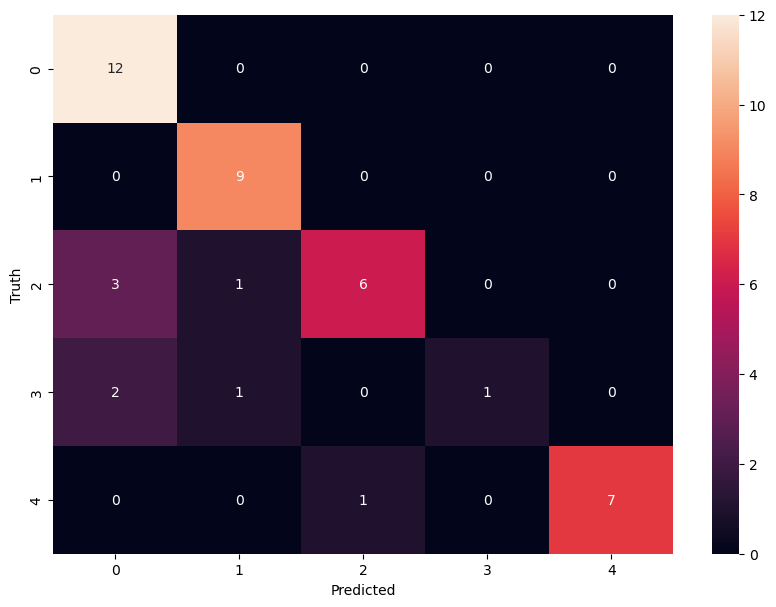

In [86]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Saving the trained model as pickle

In [87]:
#!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

## save class_dictionary as jason file

In [88]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))